Mnist is data set of hand written digit it has 10 class for 10 digit, for this problem i use keras squencial model. cnn is techique find feature in image data. we mostly use this technique in computer vision. for data processiong i use pandas module.
for data visualization use matplotlib.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
# load train and test data
train = pd.read_csv("train.csv")

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# divide feature and label and scale the feature by dividing image by 255 
X_train = train.iloc[:, 1:785].values/255
Y_train = train.iloc[:, 0:1].values

In [8]:
# one hot encoding
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y_train = enc.fit_transform(Y_train)
enc.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
# making flatten array 1d array into mutli dimension array 2d 
X_train = X_train.reshape(-1, 28, 28, 1)
print("Train Data : ",X_train.shape, Y_train.shape)



Train Data :  (42000, 28, 28, 1) (42000, 10)


In [10]:
# cnn model
model = Sequential()
model.add(Conv2D(filters = 20, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1))) #first Convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling layer

model.add(Conv2D(filters = 40, kernel_size = (5, 5), activation='relu')) #second convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling layer

model.add(Dropout(0.25)) # dropout to reduce overfitting
model.add(Flatten()) # layer convert output in 1-D array

model.add(Dense(1000, activation='relu')) # Fully connected layer
model.add(Dropout(0.5)) #dropout layer

model.add(Dense(1000, activation='relu')) # Fully connected layer
model.add(Dropout(0.5)) #dropout layer

model.add(Dense(10, activation='softmax')) #final output layer

model.compile(loss="categorical_crossentropy",
              optimizer="Adadelta",
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)  

In [11]:
history = model.fit(X_train, Y_train, batch_size=128, verbose = 1, epochs=10 ,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 41s 1ms/step - loss: 0.3573 - acc: 0.8833 - val_loss: 0.0766 - val_acc: 0.9731
Epoch 2/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0915 - acc: 0.9726 - val_loss: 0.0586 - val_acc: 0.9802
Epoch 3/10
37800/37800 [==============================] - 44s 1ms/step - loss: 0.0663 - acc: 0.9796 - val_loss: 0.0385 - val_acc: 0.9869
Epoch 4/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0543 - acc: 0.9838 - val_loss: 0.0318 - val_acc: 0.9890
Epoch 5/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0466 - acc: 0.9859 - val_loss: 0.0320 - val_acc: 0.9898
Epoch 6/10
37800/37800 [==============================] - 45s 1ms/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0298 - val_acc: 0.9900
Epoch 7/10
37800/37800 [==============================] - 44s 1ms/step - loss: 0.

In [12]:
model.save("digit.model")

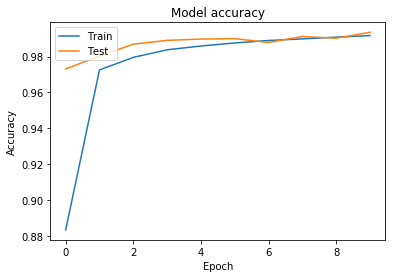

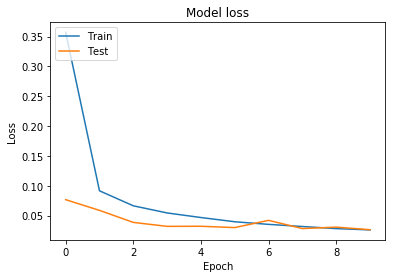

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
test = pd.read_csv("test.csv")
X_test = test.iloc[:, :785].values/255
X_test = X_test.reshape(-1, 28, 28, 1)

In [20]:
pred = model.predict(X_test)
pred

array([[9.3101782e-14, 4.9919910e-13, 1.0000000e+00, ..., 1.4721503e-12,
        1.8222872e-14, 8.2431024e-19],
       [9.9999440e-01, 5.6620872e-09, 9.6604936e-07, ..., 2.2002075e-07,
        1.9642822e-08, 8.9956956e-07],
       [4.9477120e-09, 1.6051414e-09, 7.0173339e-10, ..., 3.3511004e-08,
        4.2995880e-06, 9.9997079e-01],
       ...,
       [6.3412435e-18, 4.1948975e-14, 8.1192233e-15, ..., 1.5250609e-13,
        5.5420197e-14, 5.8781338e-13],
       [1.1611729e-08, 2.6496789e-09, 1.0714434e-09, ..., 1.0974019e-06,
        1.0840992e-07, 9.9997103e-01],
       [1.0716782e-14, 2.1219300e-13, 1.0000000e+00, ..., 3.5696164e-13,
        8.0271917e-14, 5.0289986e-19]], dtype=float32)

In [22]:
pred =pred.argmax(axis=1)
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [24]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [25]:
sample_submission["Label"] = pred

In [26]:
sample_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [28]:
sample_submission.to_csv("sample_submission_result.csv",index=False)